# UNIQA Trustpilot Reviews (General Information and Sentiment)

In [19]:
#importing libraries
from scrapethat import *
import pandas as pd
from datetime import datetime
from deep_translator import GoogleTranslator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from plotnine import *

Testing with the 1st page of the trust pilot website

In [6]:
site = read_cloud('https://at.trustpilot.com/review/uniqa.at')
paragraphs = site.find_all('p')

In [7]:
page1 = [paragraph.get_text() for paragraph in paragraphs[15:55] if 'Datum' not in paragraph.get_text()]

Defining function to get all pages from trust pilots

In [8]:
def get_reviews(url):
    try:
        if url == 'https://at.trustpilot.com/review/uniqa.at?page=6':
            site = read_cloud(url)
            paragraphs = site.find_all('p')
            reviews = [paragraph.get_text() for paragraph in paragraphs[15:45] if 'Datum' not in paragraph.get_text()]
        else:
            site = read_cloud(url)
            paragraphs = site.find_all('p')
            reviews = [paragraph.get_text() for paragraph in paragraphs[15:55] if 'Datum' not in paragraph.get_text()]
        return reviews
    except:
        return None

In [9]:
#gathering all trust pilot urls
trust_pilot_urls = [f'https://at.trustpilot.com/review/uniqa.at?&page={i}' for i in range(2,7)]
trust_pilot_urls.append(f'https://at.trustpilot.com/review/uniqa.at')

In [10]:
trust_pilot_urls

['https://at.trustpilot.com/review/uniqa.at?&page=2',
 'https://at.trustpilot.com/review/uniqa.at?&page=3',
 'https://at.trustpilot.com/review/uniqa.at?&page=4',
 'https://at.trustpilot.com/review/uniqa.at?&page=5',
 'https://at.trustpilot.com/review/uniqa.at?&page=6',
 'https://at.trustpilot.com/review/uniqa.at']

In [11]:
#test with page 6 (which has fewer reviews)
get_reviews('https://at.trustpilot.com/review/uniqa.at?&page=6')

['Service ist super wenn man Vertrag abschließen will. Danach zu vergessen',
 'Versucht sich mittlerweile aus jeder Leistungspflicht herauszuwinden, mittlerweile leider die mit Abstand schlechteste Versicherung',
 'In Zeiten von Corona nicht entgegenkommend',
 'Äußerst kompetente Beratung, hohe Kundenorientierung, sehr guter Service - es passt einfach alles',
 'Kundenportal funktioniert nicht, Benachrichtigungen können nicht empfangen werden.',
 'nicht gut, nicht empfohlen',
 'Wenn ich 0 geben könnten dann wärs 0!!!!!',
 'Einfach letztklassig',
 'Beanspruchen Sie Ihr Profil, um Zugang zu den kostenfreien Business-Tools von Trustpilot zu erhalten und die Beziehung zu Ihren Kunden zu stärken.',
 'Beanspruchen Sie Ihr Profil, um Zugang zu den kostenfreien Business-Tools von Trustpilot zu erhalten und die Beziehung zu Ihren Kunden zu stärken.',
 'Informationen, die aus verschiedenen externen Quellen stammen',
 'Wienerstaedtische',
 '22',
 'Profil nicht beansprucht',
 'Grazer Wechselseitige

In [12]:
#getting all reviews
all_reviews = list(map(lambda url: get_reviews(url), trust_pilot_urls))
all_reviews

[['Selten sowas unprofessionelles erlebt.Haus erworben, war vorher mit Uniqa versichert. Wie vorgeschrieben ihnen per Kontaktformular Bescheid gegeben, bin neuer Besitzer, anbei Kaufvertrag. Keine Antwort. Nach ein paar Tagen angerufen, "schreiben Sie uns bitte nochmals, sehe hier nichts". Wieder geschrieben, wieder keine Antwort, aber immer autom. Bestätigungsmail. Nach drei Anrufen hat es dann geklappt.Nachdem wir jetzt im Grundbuch stehen können wir kündigen, selber Zirkus. Schon drei Kündigungen geschickt, dafür zwei Mal die Mail erhalten "Wir begrüßen Sie als neuen Kunden". Großartig. Die sehen mich nicht mehr.',
  'unkompetentes Personal, das weder Namen noch Unterschrift unter ihre, überwiegend ablehnenden, Schreiben setzt. Berechtigte Schadensfälle werden mit fachlich wie sachlich falschen Begründungen abgelehnt. Es bleibt nur der Klagsweg über.Älteren Menschen, die z.B. auf Kur durch mangelnde Betreuung  verunfallen (mehrere Rippenbrüche), wird jegliches Schmerzensgeld verwehr

### Now, want to try pandas df to draw multiple pieces of info from the reviews

In [13]:
def get_all_info (site):
    try:
        site = read_cloud(site)
        #username
        usernames = site.find_all('span', class_ = 'typography_heading-xxs__QKBS8 typography_appearance-default__AAY17')
        username_list = [username.get_text() for username in usernames]
        #amount of reviews per user on Trustpilot
        review_nums = site.find_all('span', class_ = 'typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l')
        all_review_nums = [int(review_num.get_text().split()[0]) for review_num in review_nums][3:]
        #country/location of user
        countries = site.find_all('span', class_ = '')
        all_countries = [cun.get_text() for cun in countries if (len(cun.get_text()) < 4) and (cun.get_text() != '')]
        #title/header on review
        titles = site.find_all('h2', class_ = 'typography_heading-s__f7029 typography_appearance-default__AAY17')
        all_titles = [title.get_text() for title in titles]
        #stars given out of 5
        stars = site.find_all('img', alt = True)
        all_stars = [int(star['alt'].split()[2]) for star in stars if 'Bewertet' in star['alt']]
        ####dates/times of when review was written
        times = site.find_all('time', datetime = True)
        datetime_strings = [time['datetime'] for time in times]
        datetime_objects = [datetime.fromisoformat(dt.replace('Z', '+00:00')) for dt in datetime_strings]
        hours = [dt.hour  for dt in datetime_objects]
        times_of_day = []
        for hour in hours:
            if hour < 12:
                time_of_day = 'Morgen'
            elif hour >=12 and hour <=18:
                time_of_day = 'Nachmittag'
            else:
                time_of_day = 'Abend'
            times_of_day.append(time_of_day)
        #mon = 0, sun = 6
        weekdays = [dt.weekday() for dt in datetime_objects]
        ####Date of experience
        #changed and will need to fix later
#         experience_dates = site.find_all('p')
#         date_experienced = [date.get_text().split(':')[1].strip() for date in experience_dates if 'Date' in date.get_text()]
#         date_experienced_dt_objects = [datetime.strptime(date_str, '%B %d, %Y') for date_str in date_experienced]
#         date_experienced_weekdays = [dt.weekday() for dt in date_experienced_dt_objects]

        #DataFrame
        data = {
            'username':username_list,
            '#_of_reviews_per_user': all_review_nums,
            'country': all_countries,
            'review_title':all_titles,
            'stars':all_stars,
            'time_of_review':datetime_objects,
            'hour_of_review':hours,
            'time_of_day_of_review':times_of_day,
            'weekday_of_review':weekdays}
#             'date_experienced':date_experienced_dt_objects,
#             'date_experienced_weekdays':date_experienced_weekdays
        df = pd.DataFrame(data)
        return df
    except:
        return None

In [14]:
#using function to create df for 1st page
get_all_info('https://at.trustpilot.com/review/uniqa.at')

,username,#_of_reviews_per_user,country,review_title,stars,time_of_review,hour_of_review,time_of_day_of_review,weekday_of_review
0,Nadja,1,AT,Ich wollte bei Uniqa eine…,1,2024-04-21 14:39:56+00:00,14,Nachmittag,6
1,Chiara,6,AT,4 Jahre Vollkasko bezahlt,1,2024-04-11 10:39:12+00:00,10,Morgen,3
2,Maier Hans,1,AT,telefonische Betreuung vor 5min durch…,5,2024-04-08 11:33:56+00:00,11,Morgen,0
3,Inge,4,AT,Eigentlich keinen Stern,1,2024-04-02 15:46:52+00:00,15,Nachmittag,1
4,Jennifer,1,AT,"Schlecht, schlechter, Uniqua",1,2024-02-27 15:52:46+00:00,15,Nachmittag,1
5,My Cat GISMO,1,AT,Nie Wieder Uniqa nur Probleme.,1,2024-03-11 12:50:35+00:00,12,Nachmittag,0
6,Lisa,1,DE,Auf keinen Fall nochmal,1,2024-01-31 20:19:39+00:00,20,Abend,2
7,Dani H,7,AT,2 x angerufen 2x nach dem…,1,2024-03-18 14:12:38+00:00,14,Nachmittag,0
8,violeta hörfarter,1,AT,Unfallversicherung,1,2023-12-11 18:09:02+00:00,18,Nachmittag,0
9,Linder,3,AT,Nur Probleme,1,2023-10-30 12:39:48+00:00,12,Nachmittag,0


In [15]:
#all review info
dataframes = [get_all_info(url) for url in trust_pilot_urls]
dataframes

[None,
                               username  #_of_reviews_per_user country  \
 0                      starwars coffee                      2      AT   
 1                                   VV                      4      DE   
 2                   Gerhard KEUSCHNIGG                      1      AT   
 3   Maximilian Koeninger (Mr. Utilman)                      3      CH   
 4                 Günter Schindlmaier                       2      DE   
 5                      Marcel Stossier                      2      AT   
 6                            Sei Honig                      4      AT   
 7                    Bernd Mödritscher                      1      AT   
 8                               M.daki                     21      AT   
 9                                Do me                     10      AT   
 10                 Daniela Sinadinoska                      1      AT   
 11                             Gerhard                      5      AT   
 12                            

In [16]:
#df of all reviews
all_info = pd.concat(dataframes).reset_index()
all_info

,index,username,#_of_reviews_per_user,country,review_title,stars,time_of_review,hour_of_review,time_of_day_of_review,weekday_of_review
0,0,starwars coffee,2,AT,Einfach eine Sauerei!,1,2021-04-20 08:05:50+00:00,8,Morgen,1
1,1,VV,4,DE,Im Büro in Varna wird man schlimmer als Gefang...,1,2022-10-20 17:39:19+00:00,17,Nachmittag,3
2,2,Gerhard KEUSCHNIGG,1,AT,Kunde ist (nicht) König,1,2022-02-03 17:14:34+00:00,17,Nachmittag,3
3,3,Maximilian Koeninger (Mr. Utilman),3,CH,Uniqa ist für mich Abzockerei,1,2020-02-14 13:31:43+00:00,13,Nachmittag,4
4,4,Günter Schindlmaier,2,DE,Mir ist es leider nicht anders…,1,2021-08-25 17:54:12+00:00,17,Nachmittag,2
...,...,...,...,...,...,...,...,...,...,...
89,15,Sohn,1,AT,Auszahlung wird bewusst verzögert - man wird i...,1,2023-12-07 12:14:08+00:00,12,Nachmittag,3
90,16,Christian Hoheneder,5,AT,sehr schwach!,1,2023-11-17 14:56:01+00:00,14,Nachmittag,4
91,17,R. D.,7,AT,Kein Stern wenn es möglich wäre!,1,2023-01-26 18:24:53+00:00,18,Nachmittag,3
92,18,Evelyn Nowak,6,AT,Schlechte Erfahrung,1,2023-05-27 05:17:09+00:00,5,Morgen,5


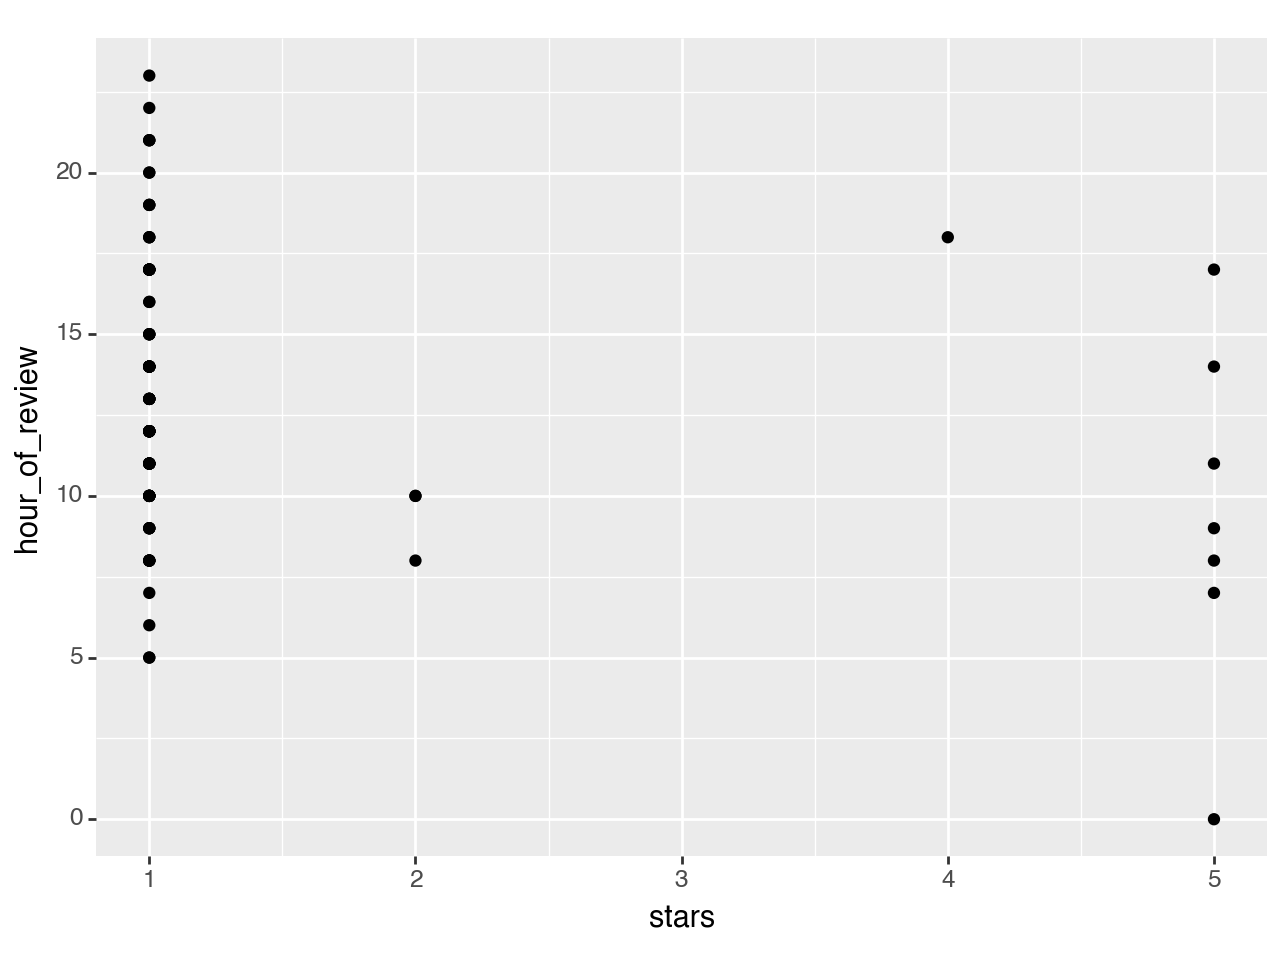

<Figure Size: (640 x 480)>

In [25]:
ggplot(all_info, aes(x = 'stars', y = 'hour_of_review')) + geom_point()
#not super interesting but could be that the later in the day it was, the worse the review, whereas a bit earlier
#had the best reviews

In [13]:
all_info.country.value_counts()

country
AT    84
DE     6
CH     2
UA     1
ES     1
Name: count, dtype: int64

In [14]:
all_info.time_of_day_of_review.value_counts()

time_of_day_of_review
Nachmittag    46
Morgen        38
Abend         10
Name: count, dtype: int64

### Trying Sentiment Analysis using NLTK Library

In [15]:
#testing translator
to_translate = 'Ich möchte ihr ein Geschenk zum Geburtstag kaufen, weil dieser bald vor der Tür steht und sie nett zu mir ist'
translated = GoogleTranslator(source='auto', target='en').translate(to_translate)
translated
#source = https://medium.com/analytics-vidhya/how-to-translate-text-with-python-9d203139dcf5

"I want to buy her a present for her birthday because it's coming up soon and she's nice to me"

In [16]:
#translating all reviews from German to English so that I can use NLTK's SentimentIntensityAnalyzer
translated_reviews = []
for review_list in all_reviews:
    for review in review_list:
        to_translate = review
        translated = GoogleTranslator(source= 'auto', target = 'en').translate(to_translate)
        translated_reviews.append(translated)
print(translated_reviews)

['Rarely have we experienced something so unprofessional. The house was purchased and was previously insured with Uniqa. As required, I informed you via the contact form, I am the new owner, attached the purchase contract. No Answer. Called after a few days, "please write to us again, I don\'t see anything here." Written again, again no answer, but always automatic. Confirmation email. After three calls it worked. Now that we are in the land register we can cancel, even circus. Already sent three cancellations and received the email “We welcome you as a new customer” twice. Great. They don\'t see me anymore.', 'incompetent staff who do not put names or signatures on their mostly negative letters. Justified claims are rejected based on technically and factually incorrect reasons. The only option left is to file a lawsuit. Older people who, for example, have an accident while on a spa (several rib fractures) due to a lack of care are denied any compensation for pain and suffering.', "For

In [17]:
sentiment_results = []
sentiment_scores = []

#download VADER lexicon...already did (good for social media)
#nltk.download('vader_lexicon')

#initializing sia
sia = SentimentIntensityAnalyzer()

#sentiment for each translated review
for review in translated_reviews:
    #sentiment score
    scores = sia.polarity_scores(review)
    
    #classify sentiment based on compound score (chose 0.8 because most underneath were negative)
    if scores['compound'] >= 0.8:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    
    #get list of sentiments and sentiment scores
    sentiment_results.append(sentiment)
    sentiment_scores.append(scores['compound'])
    
    #see each translated review along with its sentiment score and sentiment
    print(f"Review: {review}\nSentiment Score: {scores}\n Sentiment: {sentiment}\n")


Review: Rarely have we experienced something so unprofessional. The house was purchased and was previously insured with Uniqa. As required, I informed you via the contact form, I am the new owner, attached the purchase contract. No Answer. Called after a few days, "please write to us again, I don't see anything here." Written again, again no answer, but always automatic. Confirmation email. After three calls it worked. Now that we are in the land register we can cancel, even circus. Already sent three cancellations and received the email “We welcome you as a new customer” twice. Great. They don't see me anymore.
Sentiment Score: {'neg': 0.076, 'neu': 0.821, 'pos': 0.103, 'compound': 0.7166}
 Sentiment: negative

Review: incompetent staff who do not put names or signatures on their mostly negative letters. Justified claims are rejected based on technically and factually incorrect reasons. The only option left is to file a lawsuit. Older people who, for example, have an accident while on

In [18]:
#Number of negative and positive reviews
print(f"Negative reviews as determined by sentiment analysis: {sentiment_results.count('negative')}")
print(f"Positive reviews as determined by sentiment analysis: {sentiment_results.count('positive')}")

Negative reviews as determined by sentiment analysis: 117
Positive reviews as determined by sentiment analysis: 9


In [19]:
avg_sentiment = sum(sentiment_scores)/len(sentiment_scores)
print(f"Average UNIQA sentiment score on Trustpilot: {avg_sentiment}. As I defined negative sentiment as a score less than 0.8, this is overall very negative.")

Average UNIQA sentiment score on Trustpilot: -0.21951984126984114. As I defined negative sentiment as a score less than 0.8, this is overall very negative.


## Plotting Visualizations

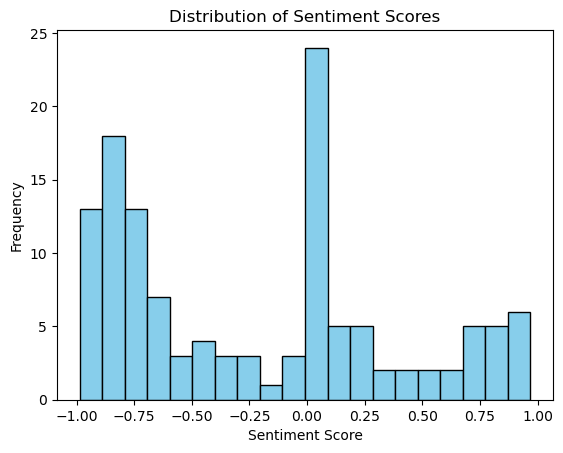

In [20]:
#plotting sentiment scores
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


## ChatGPT Sentiment Analysis
I used ChatGPT to do sentiment analysis with the Google Reviews, so I decided to compare my own model against ChatGPT's analysis.

In [31]:
chatgpt_sen_ana = pd.read_csv('UNIQA Trustpilot Reviews_ChatGPT Sentiment Analysis Table - Sheet1.csv')
chatgpt_sen_ana.rename(columns = {'Sentiment Score':'Sentiment_Score'}, inplace = True)
chatgpt_sen_ana.drop(columns=['#'], inplace = True)

In [32]:
chatgpt_sen_ana

,Review,Sentiment_Score,Sentiment
0,Rarely have we experienced something so unprof...,-0.98,Negative
1,Incompetent staff who do not put names or sign...,-0.94,Negative
2,For me they are criminals. I have business int...,-0.97,Negative
3,Stay away from this insurance I had a torn lig...,-0.91,Negative
4,Remuneration is repeatedly refused and only pa...,-0.89,Negative
...,...,...,...
121,"When paying out my mother's life insurance, Un...",-0.90,Negative
122,I am very disappointed with uniqua! Not only i...,-0.90,Negative
123,I can only advise against taking out insurance...,-0.90,Negative
124,"Bad experience, you are not treated like a cus...",-0.90,Negative


In [33]:
#KPIs/stats:
chatgpt_sen_ana.Sentiment_Score.mean()

-0.6532539682539685

ChatGPT analyzed the reviews as being much more negative than my original model predicted. 
- ChatGPT average sentiment score: -0.653
- My original model sentiment score: -0.219

In [34]:
chatgpt_sen_ana.Sentiment.value_counts()

Sentiment
Negative    98
Neutral     18
Positive    10
Name: count, dtype: int64

ChatGPT also saw many more reviews as being neutral and positive than my original model- however, my original model didn't take neutral into account. However, after looking at the reviews more in depth, I have come to the conclusion that ChatGPT's sentiment analysis was better than the model I had created. Not only did ChatGPT's sentiment analyzer take 'neutral' sentiment into account, but it mostly always predicted it correctly- according to my analysis after going through each review. 

I also asked ChatGPT to count the instances of each word (CountVectorizer) from the reviews:
- `insurance`: 83 times
- `Uniqa`: 66 times
- `service`: 14 times
- `negative`: 13 times
- `contract`: 7 times
- `customer`: 7 times

From this it is somewhat hard to tell if there is a specific problem area that is causing customers to feel negative feelings towards Uniqa insurance; however, something that can be inferred from the fact that `service` appears a considerable amount of times, is that 'customer service' might be a problem area in the company leading customers to 